In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

Text(0, 0.5, 'MtCO2/year')

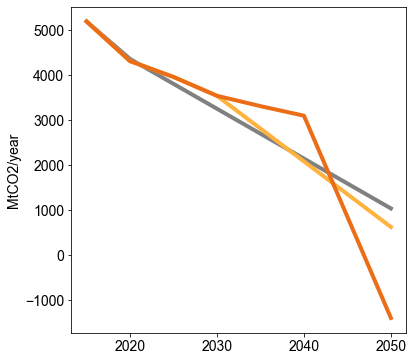

In [2]:
#trajectory
df=pd.read_excel("CO2_accounting_0826.xlsx",sheet_name='total')
# df = df[df['Year'].isin(['2015', '2020','2025','2030','2035','2040','2045','2050'])]
df = df[df['Year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
time=df['Year']
ES=df['stick']
E2030=df['2030nl']
E2040=df['2040nl']
E_allin= df['all-in-ref']
E2050 = df['2050nl']

#plotting code
plt.figure(figsize=(6, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14

plt.plot(time,ES, color='gray', linewidth=4)
plt.plot(time,E2030, color= '#FFB23D', linewidth=4)
plt.plot(time,E2040 , color = '#EC6D18', linewidth=4)
# plt.plot(time,E_allin , color = '#856727', linewidth=4)
plt.ylabel("MtCO2/year")

# plt.title("a) Energy system CO2 emissions since 2015", size=18)



In [3]:
# E2050

Text(0, 0.5, 'GtCO2')

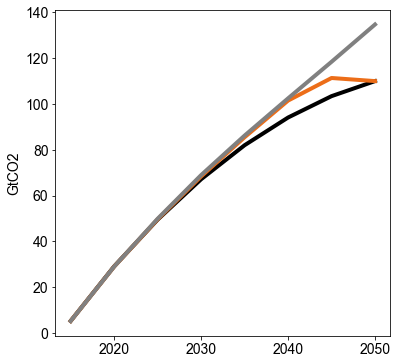

In [4]:
#cumulative

#calculating
ES_c=[]
Total=0
for i in range(len(df['Year'])):

    year = df['Year'].iloc[i]
    emission =df ['stick'].iloc[i]
    if year == 2015:
        ES_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['stick'].iloc[i-1])
        Total = Total + total
        ES_c.append(Total)

E2030_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2030nl'].iloc[i]
    if year == 2015:
        E2030_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['2030nl'].iloc[i-1])
        Total = Total + total
        E2030_c.append(Total)

E2040_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2040nl'].iloc[i]
    if year == 2015:
        E2040_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+df ['2040nl'].iloc[i-1])
        Total = Total + total
        E2040_c.append(Total)
E2050_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =E2050[i]
    if year == 2015:
        E2050_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2050[i-1])
        Total = Total + total
        E2050_c.append(Total)
E_allin_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =E_allin[i]
    if year == 2015:
        E_allin_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E_allin[i-1])
        Total = Total + total
        E_allin_c.append(Total)

ES_c= [x / 1000 for x in ES_c]
E2030_c=[x / 1000 for x in E2030_c]
E2040_c=[x / 1000 for x in E2040_c]
E2050_c=[x / 1000 for x in E2050_c]
E_allin_c=[x / 1000 for x in E_allin_c]
#plotting
plt.figure(figsize=(6, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14


# plt.plot(time,ES_c, color='gray', linewidth=4)
plt.plot(time,ES_c, color='black', linewidth=4)
# plt.plot(time,E2030_c, color= '#FFB23D', linewidth=4)
# plt.plot(time,E2040_c, color = '#EC6D18', linewidth=4)
plt.plot(time,E2040_c, color = '#EC6D18', linewidth=4)
plt.plot(time,E2050_c, color='gray', linewidth=4)
plt.ylabel("GtCO2")



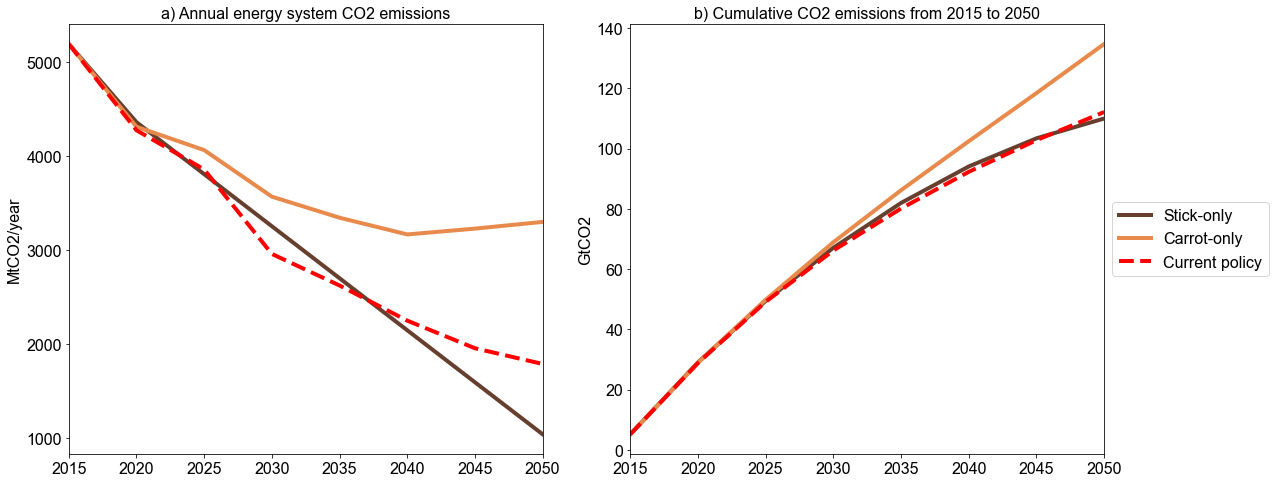

In [5]:
#plotting code

fig = plt.figure(figsize=(18, 7))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16


gs = fig.add_gridspec(1,3)
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

ax1.plot(time,ES, color='#673F2F', linewidth=4)
ax1.plot(time,E2050, color= '#E88A4C', linewidth=4,linestyle = "-", label = "Carrot-only")
ax1.plot(time,E_allin , color = 'red', linewidth=4,linestyle = "--", label = "Current policy")


ax1.set_ylabel("MtCO2/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='#673F2F', linewidth=4, label = "Stick-only")
ax2.plot(time,E2050_c, color= '#E88A4C', linewidth=4, linestyle = "-", label = "Carrot-only")
ax2.plot(time,E_allin_c, color = 'red', linewidth=4, linestyle = "--", label = "Current policy")

ax2.set_ylabel("GtCO2")
ax2.set_xlim(2015, 2050)
# ax2.set_ylim(0, 150)

# ax3.set_ylim(0, 230)


ax1.set_title("a) Annual energy system CO2 emissions",  fontsize = 16)
ax2.set_title("b) Cumulative CO2 emissions from 2015 to 2050", fontsize = 16)
# ax3.set_title("c) CO2 prices in 2050", fontsize = 16)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

# plt.show()

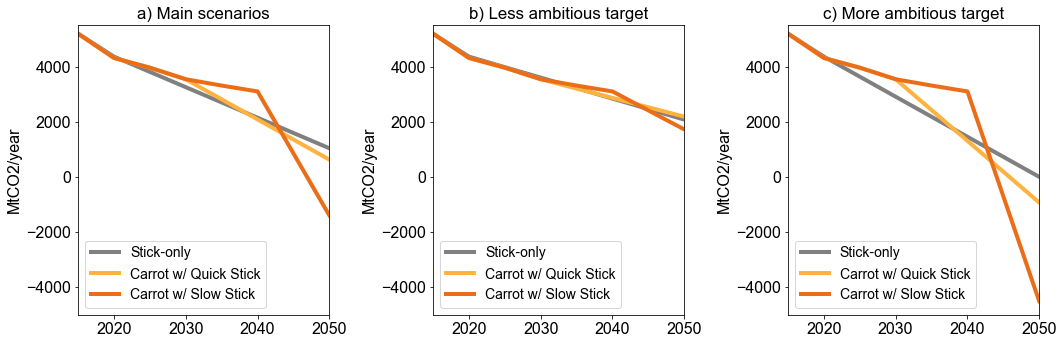

In [6]:
#trajectory
df80=pd.read_excel("CO2_trajectory_allDecarb.xlsx",sheet_name='80p')
df60=pd.read_excel("CO2_trajectory_allDecarb.xlsx",sheet_name='60p')
df100=pd.read_excel("CO2_trajectory_allDecarb.xlsx",sheet_name='100p')
# df = df[df['Year'].isin(['2015', '2020','2025','2030','2035','2040','2045','2050'])]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14
titles = ["a) Main scenarios", "b) Less ambitious target", "c) More ambitious target"]

df_list = [df80, df60, df100]
for i in range(len(df_list)):
    df = df_list[i]
    df = df[df['Year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
    time=df['Year']
    ES=df['Stick-only']
    E2030=df['Carrot w/ Quick Stick']
    E2040=df['Carrot w/ Slow Stick']
    
    axs[i].plot(time,ES, color='gray', linewidth=4, label = "Stick-only")
    axs[i].plot(time,E2030, color= '#FFB23D', linewidth=4,  label = "Carrot w/ Quick Stick")
    axs[i].plot(time,E2040 , color = '#EC6D18', linewidth=4,  label = "Carrot w/ Slow Stick")
    axs[i].set_ylabel("MtCO2/year")
    axs[i].set_title(titles[i])
    axs[i].set_ylim(-5000, 5500)
    axs[i].set_xlim(2015, 2050)
    axs[i].legend(loc='lower left')

plt.tight_layout()
plt.show()
